In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
pd.set_option("display.max_columns",None)

In [3]:
result_df = pd.read_csv('results.csv') #10 farklı parametresi işimize yarayacak
stats_df = pd.read_csv('status.csv') #Status için tutuyoruz
drivers_df = pd.read_csv('drivers.csv') #Sadece DriverId yi kullanıyoruz
races_df = pd.read_csv('races.csv')  #Sadece raceId için kullanıyoruz
constructor_df = pd.read_csv('constructors.csv') #constructorId,constructorRef kullanıyoruz
driver_standings_df = pd.read_csv('driver_standings.csv')#DriverId için tutuyoruz
pit_stop=pd.read_csv("pit_stops.csv")

In [4]:
unique_drivers = result_df.raceId.unique()
total_unique_drivers = len(unique_drivers)

print("Toplam benzersiz raceId sayısı:", total_unique_drivers)
print("raceId benzersiz değerleri:", unique_drivers)

unique_drivers = pit_stop.raceId.unique()
total_unique_drivers = len(unique_drivers)

print("Toplam benzersiz raceId sayısı:", total_unique_drivers)
print("raceId benzersiz değerleri:", unique_drivers)

Toplam benzersiz raceId sayısı: 1113
raceId benzersiz değerleri: [  18   19   20 ... 1130 1131 1132]
Toplam benzersiz raceId sayısı: 273
raceId benzersiz değerleri: [ 841  842  843  844  845  846  847  848  849  850  851  852  853  854
  855  856  857  858  859  860  861  862  863  864  865  866  867  868
  869  870  871  872  873  874  875  876  877  878  879  880  881  882
  883  884  885  886  887  888  890  891  892  893  894  895  896  897
  898  899  900  901  902  903  904  905  906  907  908  909  910  911
  912  913  914  915  916  917  918  926  927  928  929  930  931  932
  933  934  936  937  938  939  940  941  942  943  944  945  948  949
  950  951  952  953  954  955  956  957  958  959  960  961  962  963
  964  965  966  967  968  969  970  971  972  973  974  975  976  977
  978  979  980  981  982  983  984  985  986  987  988  989  990  991
  992  993  994  995  996  997  998  999 1000 1001 1002 1003 1004 1005
 1006 1007 1008 1009 1010 1011 1012 1013 1014 1015 101

In [5]:
result_df = result_df.merge(constructor_df[['constructorId', 'constructorRef']], on='constructorId', how='left')
result_df

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId,constructorRef
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1,mclaren
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1,bmw_sauber
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1,williams
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1,renault
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1,mclaren
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26514,26520,1132,839,214,31,18,16,16,16,0.0,50,\N,\N,46,16,1:30.875,233.371,12,alpine
26515,26521,1132,815,9,11,0,17,17,17,0.0,50,\N,\N,50,6,1:29.707,236.409,12,red_bull
26516,26522,1132,855,15,24,14,18,18,18,0.0,50,\N,\N,43,17,1:31.014,233.014,12,sauber
26517,26523,1132,847,131,63,1,\N,R,19,0.0,33,\N,\N,3,19,1:31.298,232.289,34,mercedes


In [6]:
result_df = result_df.merge(races_df[['raceId', 'year']], on='raceId', how='left')
result_df

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId,constructorRef,year
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1,mclaren,2008
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1,bmw_sauber,2008
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1,williams,2008
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1,renault,2008
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1,mclaren,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26514,26520,1132,839,214,31,18,16,16,16,0.0,50,\N,\N,46,16,1:30.875,233.371,12,alpine,2024
26515,26521,1132,815,9,11,0,17,17,17,0.0,50,\N,\N,50,6,1:29.707,236.409,12,red_bull,2024
26516,26522,1132,855,15,24,14,18,18,18,0.0,50,\N,\N,43,17,1:31.014,233.014,12,sauber,2024
26517,26523,1132,847,131,63,1,\N,R,19,0.0,33,\N,\N,3,19,1:31.298,232.289,34,mercedes,2024


In [7]:
result_df = result_df.merge(drivers_df[['driverId', 'driverRef']], on='driverId', how='left')
result_df

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId,constructorRef,year,driverRef
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1,mclaren,2008,hamilton
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1,bmw_sauber,2008,heidfeld
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1,williams,2008,rosberg
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1,renault,2008,alonso
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1,mclaren,2008,kovalainen
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26514,26520,1132,839,214,31,18,16,16,16,0.0,50,\N,\N,46,16,1:30.875,233.371,12,alpine,2024,ocon
26515,26521,1132,815,9,11,0,17,17,17,0.0,50,\N,\N,50,6,1:29.707,236.409,12,red_bull,2024,perez
26516,26522,1132,855,15,24,14,18,18,18,0.0,50,\N,\N,43,17,1:31.014,233.014,12,sauber,2024,zhou
26517,26523,1132,847,131,63,1,\N,R,19,0.0,33,\N,\N,3,19,1:31.298,232.289,34,mercedes,2024,russell


In [8]:
result_df = result_df.rename(columns={'constructorRef_x': 'constructorRef','driverRef_x': 'driverRef','year_x': 'year'})

In [9]:
result_df

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId,constructorRef,year,driverRef
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1,mclaren,2008,hamilton
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1,bmw_sauber,2008,heidfeld
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1,williams,2008,rosberg
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1,renault,2008,alonso
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1,mclaren,2008,kovalainen
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26514,26520,1132,839,214,31,18,16,16,16,0.0,50,\N,\N,46,16,1:30.875,233.371,12,alpine,2024,ocon
26515,26521,1132,815,9,11,0,17,17,17,0.0,50,\N,\N,50,6,1:29.707,236.409,12,red_bull,2024,perez
26516,26522,1132,855,15,24,14,18,18,18,0.0,50,\N,\N,43,17,1:31.014,233.014,12,sauber,2024,zhou
26517,26523,1132,847,131,63,1,\N,R,19,0.0,33,\N,\N,3,19,1:31.298,232.289,34,mercedes,2024,russell


In [10]:
races_df

,raceId,year,round,circuitId,name,date,time,url,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
4,5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1120,1140,2024,20,32,Mexico City Grand Prix,2024-10-27,20:00:00,https://en.wikipedia.org/wiki/2024_Mexico_City...,2024-10-25,18:30:00,2024-10-25,22:00:00,2024-10-26,17:30:00,2024-10-26,21:00:00,\N,\N
1121,1141,2024,21,18,São Paulo Grand Prix,2024-11-03,17:00:00,https://en.wikipedia.org/wiki/2024_S%C3%A3o_Pa...,2024-11-01,14:30:00,2024-11-01,18:30:00,\N,\N,2024-11-02,18:00:00,2024-11-02,14:00:00
1122,1142,2024,22,80,Las Vegas Grand Prix,2024-11-23,06:00:00,https://en.wikipedia.org/wiki/2024_Las_Vegas_G...,2024-11-21,02:30:00,2024-11-21,06:00:00,2024-11-22,02:30:00,2024-11-22,06:00:00,\N,\N
1123,1143,2024,23,78,Qatar Grand Prix,2024-12-01,17:00:00,https://en.wikipedia.org/wiki/2024_Qatar_Grand...,2024-11-29,13:30:00,2024-11-29,17:30:00,\N,\N,2024-11-30,17:00:00,2024-11-30,13:00:00


In [11]:
constructor_df

,constructorId,constructorRef,name,nationality,url
0,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
1,2,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber
2,3,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...
3,4,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_in_Formul...
4,5,toro_rosso,Toro Rosso,Italian,http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso
...,...,...,...,...,...
207,210,haas,Haas F1 Team,American,http://en.wikipedia.org/wiki/Haas_F1_Team
208,211,racing_point,Racing Point,British,http://en.wikipedia.org/wiki/Racing_Point_F1_Team
209,213,alphatauri,AlphaTauri,Italian,http://en.wikipedia.org/wiki/Scuderia_AlphaTauri
210,214,alpine,Alpine F1 Team,French,http://en.wikipedia.org/wiki/Alpine_F1_Team


In [12]:
result_df

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId,constructorRef,year,driverRef
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1,mclaren,2008,hamilton
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1,bmw_sauber,2008,heidfeld
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1,williams,2008,rosberg
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1,renault,2008,alonso
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1,mclaren,2008,kovalainen
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26514,26520,1132,839,214,31,18,16,16,16,0.0,50,\N,\N,46,16,1:30.875,233.371,12,alpine,2024,ocon
26515,26521,1132,815,9,11,0,17,17,17,0.0,50,\N,\N,50,6,1:29.707,236.409,12,red_bull,2024,perez
26516,26522,1132,855,15,24,14,18,18,18,0.0,50,\N,\N,43,17,1:31.014,233.014,12,sauber,2024,zhou
26517,26523,1132,847,131,63,1,\N,R,19,0.0,33,\N,\N,3,19,1:31.298,232.289,34,mercedes,2024,russell


In [ ]:
WE ONLY WANT TO STATUSIS= 1(FINISH)

In [13]:
result_df=result_df[result_df.statusId==1] #Sadece yarısı bıtırenlerı alıyoruz
result_df.reset_index(drop=True, inplace=True)
result_df

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId,constructorRef,year,driverRef
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1,mclaren,2008,hamilton
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1,bmw_sauber,2008,heidfeld
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1,williams,2008,rosberg
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1,renault,2008,alonso
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1,mclaren,2008,kovalainen
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7523,26512,1132,4,117,14,10,8,8,8,4.0,52,+1:03.577,5010636,47,7,1:29.710,236.401,1,aston_martin,2024,alonso
7524,26513,1132,848,3,23,9,9,9,9,2.0,52,+1:08.387,5015446,52,8,1:29.718,236.380,1,williams,2024,albon
7525,26514,1132,852,215,22,13,10,10,10,1.0,52,+1:19.303,5026362,43,14,1:30.229,235.041,1,rb,2024,tsunoda
7526,26515,1132,858,3,2,12,11,11,11,0.0,52,+1:28.960,5036019,42,12,1:29.972,235.713,1,williams,2024,sargeant


In [14]:
result_df = result_df.copy()
result_df.replace('\\N', np.nan, inplace=True)

missing_per_column = result_df.isna().sum()

print(missing_per_column)

resultId              0
raceId                0
driverId              0
constructorId         0
number                0
grid                  0
position              0
positionText          0
positionOrder         0
points                0
laps                  0
time                  1
milliseconds          1
fastestLap         3411
rank               3383
fastestLapTime     3411
fastestLapSpeed    3411
statusId              0
constructorRef        0
year                  0
driverRef             0
dtype: int64


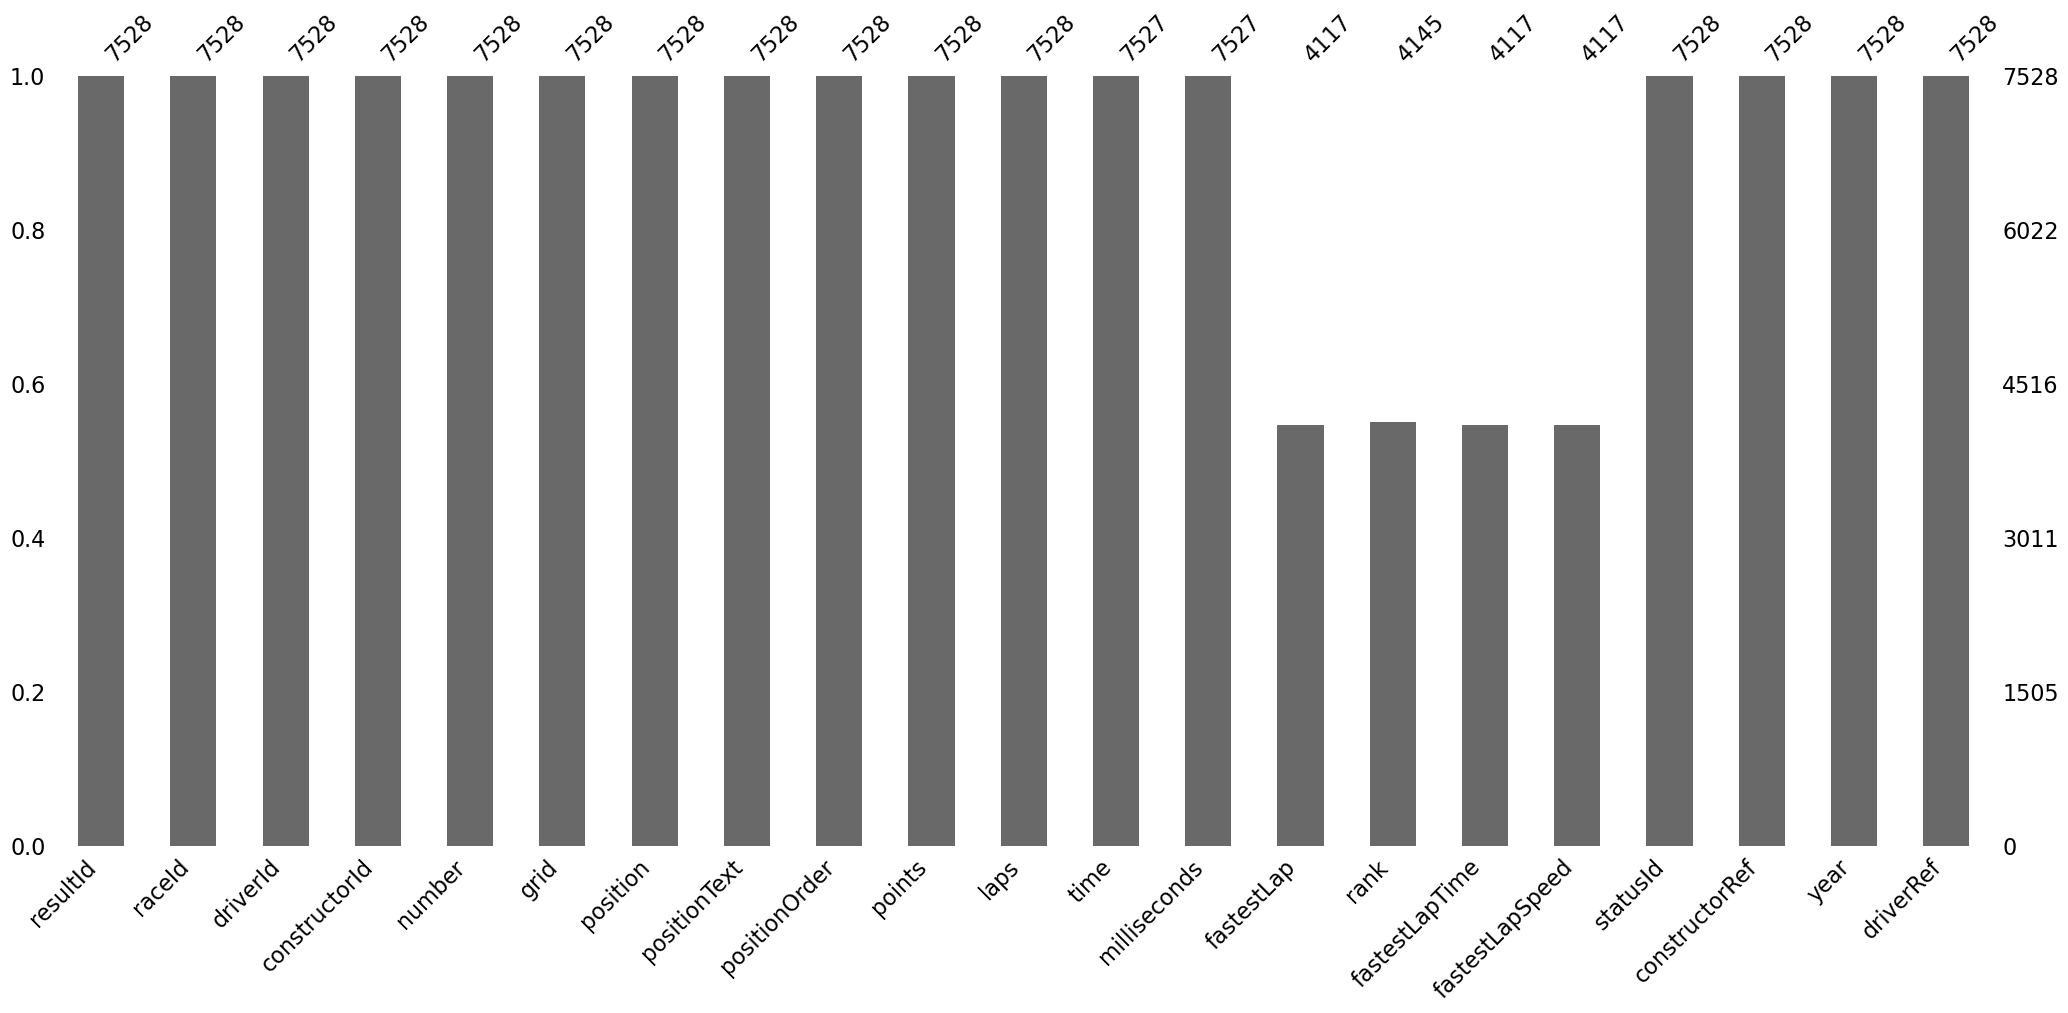

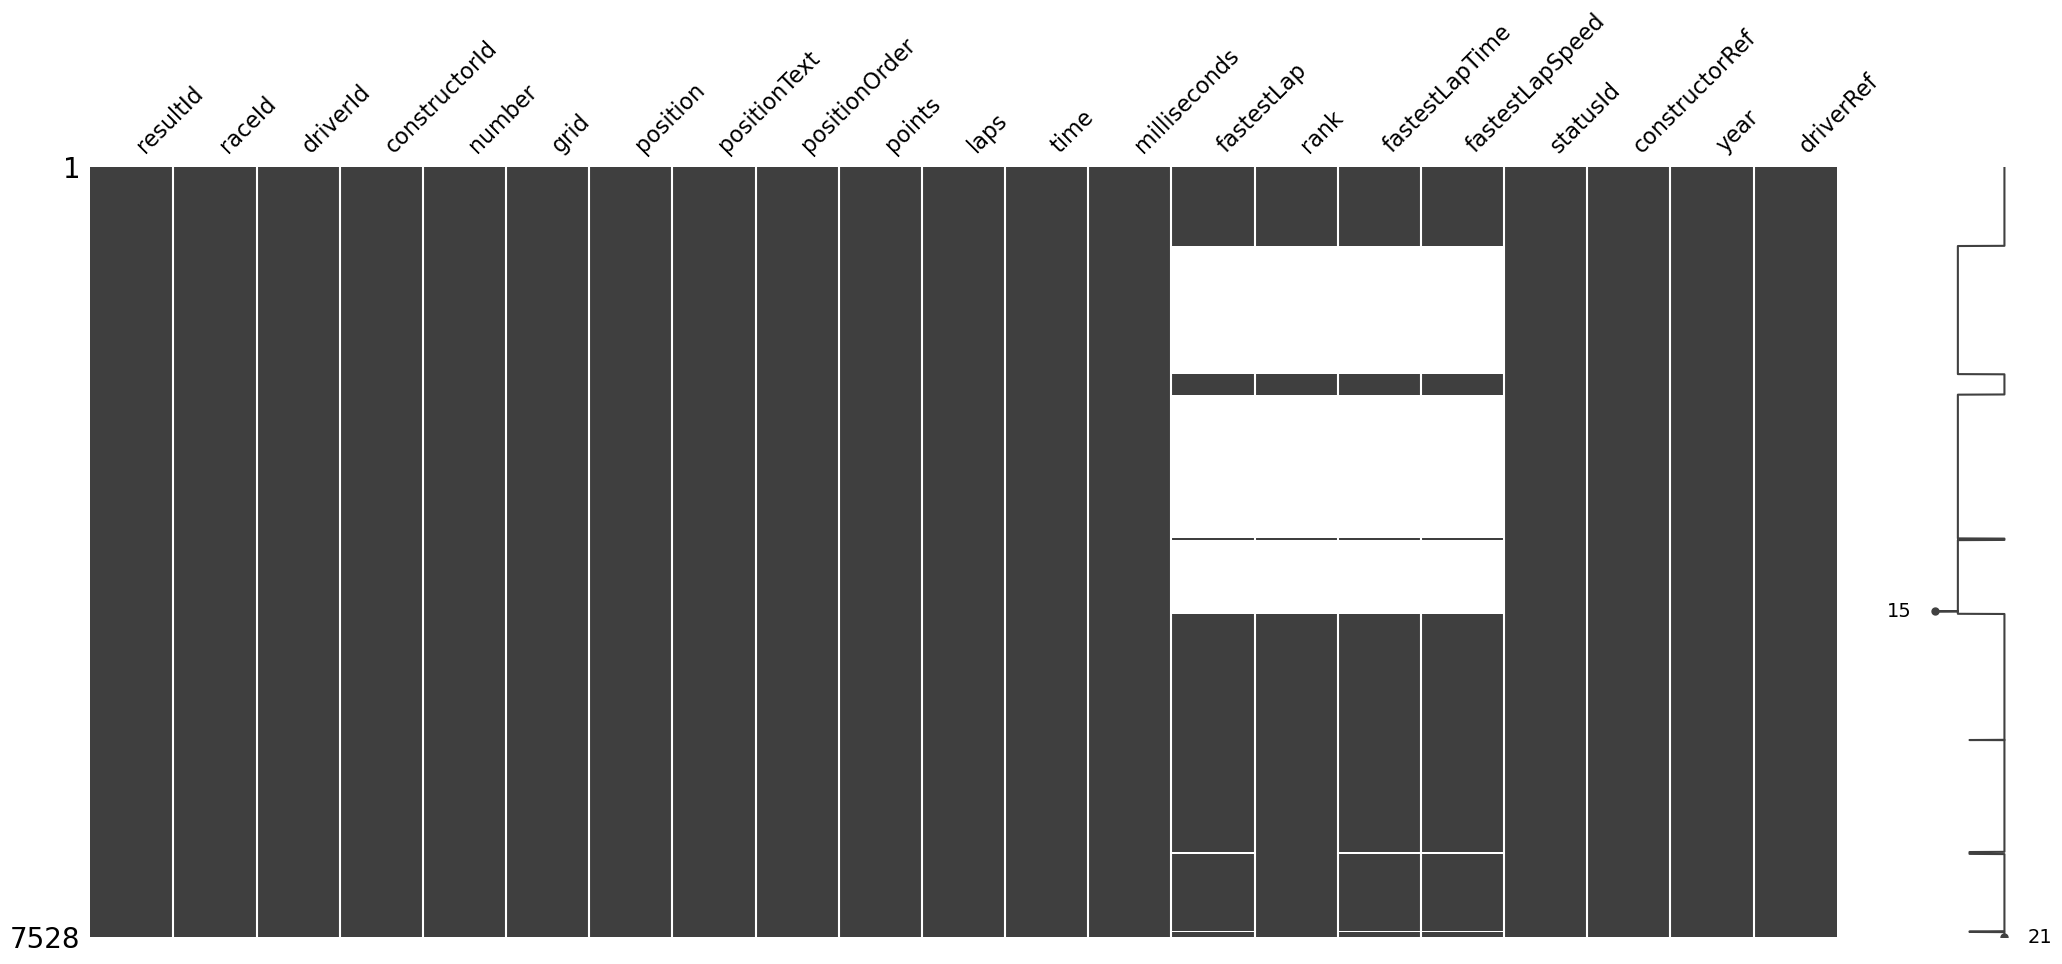

In [15]:
import missingno as msno
import matplotlib.pyplot as plt

msno.bar(result_df) 
plt.show()
msno.matrix(result_df)  
plt.show()


In [16]:
result_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7528 entries, 0 to 7527
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   resultId         7528 non-null   int64  
 1   raceId           7528 non-null   int64  
 2   driverId         7528 non-null   int64  
 3   constructorId    7528 non-null   int64  
 4   number           7528 non-null   object 
 5   grid             7528 non-null   int64  
 6   position         7528 non-null   object 
 7   positionText     7528 non-null   object 
 8   positionOrder    7528 non-null   int64  
 9   points           7528 non-null   float64
 10  laps             7528 non-null   int64  
 11  time             7527 non-null   object 
 12  milliseconds     7527 non-null   object 
 13  fastestLap       4117 non-null   object 
 14  rank             4145 non-null   object 
 15  fastestLapTime   4117 non-null   object 
 16  fastestLapSpeed  4117 non-null   object 
 17  statusId      

In [17]:
def time_to_milliseconds(time_str):
    if pd.isna(time_str):
        return None
    minutes, seconds = time_str.split(':')
    seconds, milliseconds = map(int, seconds.split('.'))
    total_milliseconds = (int(minutes) * 60 + seconds) * 1000 + milliseconds
    return total_milliseconds
result_df['fastestLapTime_ms'] = result_df['fastestLapTime'].apply(time_to_milliseconds)
result_df

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId,constructorRef,year,driverRef,fastestLapTime_ms
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1,mclaren,2008,hamilton,87452.0
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1,bmw_sauber,2008,heidfeld,87739.0
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1,williams,2008,rosberg,88090.0
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1,renault,2008,alonso,88603.0
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1,mclaren,2008,kovalainen,87418.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7523,26512,1132,4,117,14,10,8,8,8,4.0,52,+1:03.577,5010636,47,7,1:29.710,236.401,1,aston_martin,2024,alonso,89710.0
7524,26513,1132,848,3,23,9,9,9,9,2.0,52,+1:08.387,5015446,52,8,1:29.718,236.380,1,williams,2024,albon,89718.0
7525,26514,1132,852,215,22,13,10,10,10,1.0,52,+1:19.303,5026362,43,14,1:30.229,235.041,1,rb,2024,tsunoda,90229.0
7526,26515,1132,858,3,2,12,11,11,11,0.0,52,+1:28.960,5036019,42,12,1:29.972,235.713,1,williams,2024,sargeant,89972.0


In [18]:
for column in result_df.select_dtypes(include='object').columns:
    if column != 'driverRef' and column != 'constructorRef':
        result_df[column] = pd.to_numeric(result_df[column], errors='coerce')
print(result_df.dtypes)


resultId               int64
raceId                 int64
driverId               int64
constructorId          int64
number                 int64
grid                   int64
position               int64
positionText           int64
positionOrder          int64
points               float64
laps                   int64
time                 float64
milliseconds         float64
fastestLap           float64
rank                 float64
fastestLapTime       float64
fastestLapSpeed      float64
statusId               int64
constructorRef        object
year                   int64
driverRef             object
fastestLapTime_ms    float64
dtype: object


In [19]:
result_df.drop(["positionText"],inplace=True,axis=1)

In [20]:
result_df.drop(["fastestLapTime"],inplace=True,axis=1)

In [21]:
result_df.drop(["time"],inplace=True,axis=1)

In [27]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
result_df_imputed = imputer.fit_transform(result_df.select_dtypes(include='number'))
result_df[result_df.select_dtypes(include='number').columns] = result_df_imputed


In [28]:
print(result_df.isnull().sum())

resultId             0
raceId               0
driverId             0
constructorId        0
number               0
grid                 0
position             0
positionOrder        0
points               0
laps                 0
milliseconds         0
fastestLap           0
rank                 0
fastestLapSpeed      0
statusId             0
constructorRef       0
year                 0
driverRef            0
fastestLapTime_ms    0
dtype: int64


In [29]:
result_df

,resultId,raceId,driverId,constructorId,number,grid,position,positionOrder,points,laps,milliseconds,fastestLap,rank,fastestLapSpeed,statusId,constructorRef,year,driverRef,fastestLapTime_ms
0,1.0,18.0,1.0,1.0,22.0,1.0,1.0,1.0,10.0,58.0,5690616.0,39.0,2.0,218.300,1.0,mclaren,2008.0,hamilton,87452.0
1,2.0,18.0,2.0,2.0,3.0,5.0,2.0,2.0,8.0,58.0,5696094.0,41.0,3.0,217.586,1.0,bmw_sauber,2008.0,heidfeld,87739.0
2,3.0,18.0,3.0,3.0,7.0,7.0,3.0,3.0,6.0,58.0,5698779.0,41.0,5.0,216.719,1.0,williams,2008.0,rosberg,88090.0
3,4.0,18.0,4.0,4.0,5.0,11.0,4.0,4.0,5.0,58.0,5707797.0,58.0,7.0,215.464,1.0,renault,2008.0,alonso,88603.0
4,5.0,18.0,5.0,1.0,23.0,3.0,5.0,5.0,4.0,58.0,5708630.0,43.0,1.0,218.385,1.0,mclaren,2008.0,kovalainen,87418.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7523,26512.0,1132.0,4.0,117.0,14.0,10.0,8.0,8.0,4.0,52.0,5010636.0,47.0,7.0,236.401,1.0,aston_martin,2024.0,alonso,89710.0
7524,26513.0,1132.0,848.0,3.0,23.0,9.0,9.0,9.0,2.0,52.0,5015446.0,52.0,8.0,236.380,1.0,williams,2024.0,albon,89718.0
7525,26514.0,1132.0,852.0,215.0,22.0,13.0,10.0,10.0,1.0,52.0,5026362.0,43.0,14.0,235.041,1.0,rb,2024.0,tsunoda,90229.0
7526,26515.0,1132.0,858.0,3.0,2.0,12.0,11.0,11.0,0.0,52.0,5036019.0,42.0,12.0,235.713,1.0,williams,2024.0,sargeant,89972.0


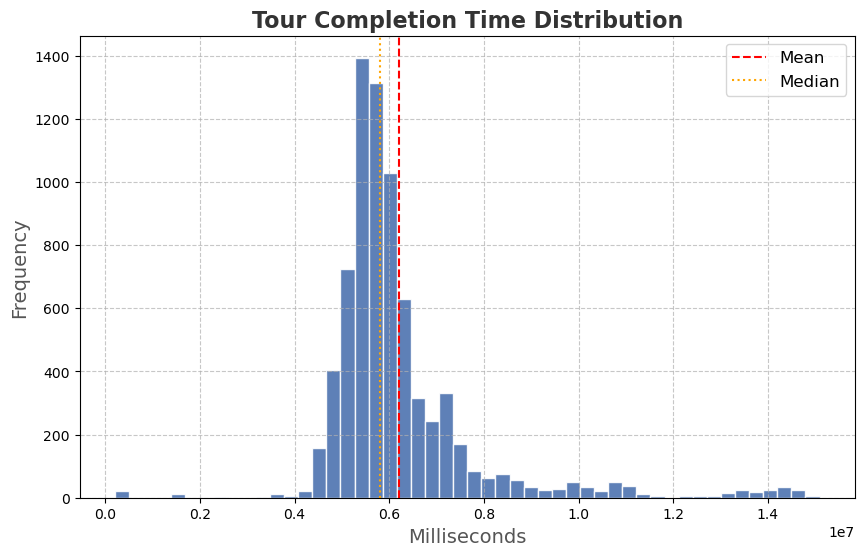

In [30]:
plt.figure(figsize=(10, 6))
plt.hist(result_df['milliseconds'].dropna(), bins=50, color='#4C72B0', edgecolor='white', alpha=0.9)
plt.title('Tour Completion Time Distribution', fontsize=16, color='#333333', fontweight='bold')
plt.xlabel('Milliseconds', fontsize=14, color='#555555')
plt.ylabel('Frequency', fontsize=14, color='#555555')
plt.grid(True, linestyle='--', alpha=0.7)
plt.axvline(result_df['milliseconds'].mean(), color='red', linestyle='--', label='Mean')
plt.axvline(result_df['milliseconds'].median(), color='orange', linestyle=':', label='Median')
plt.legend(fontsize=12)
plt.show()


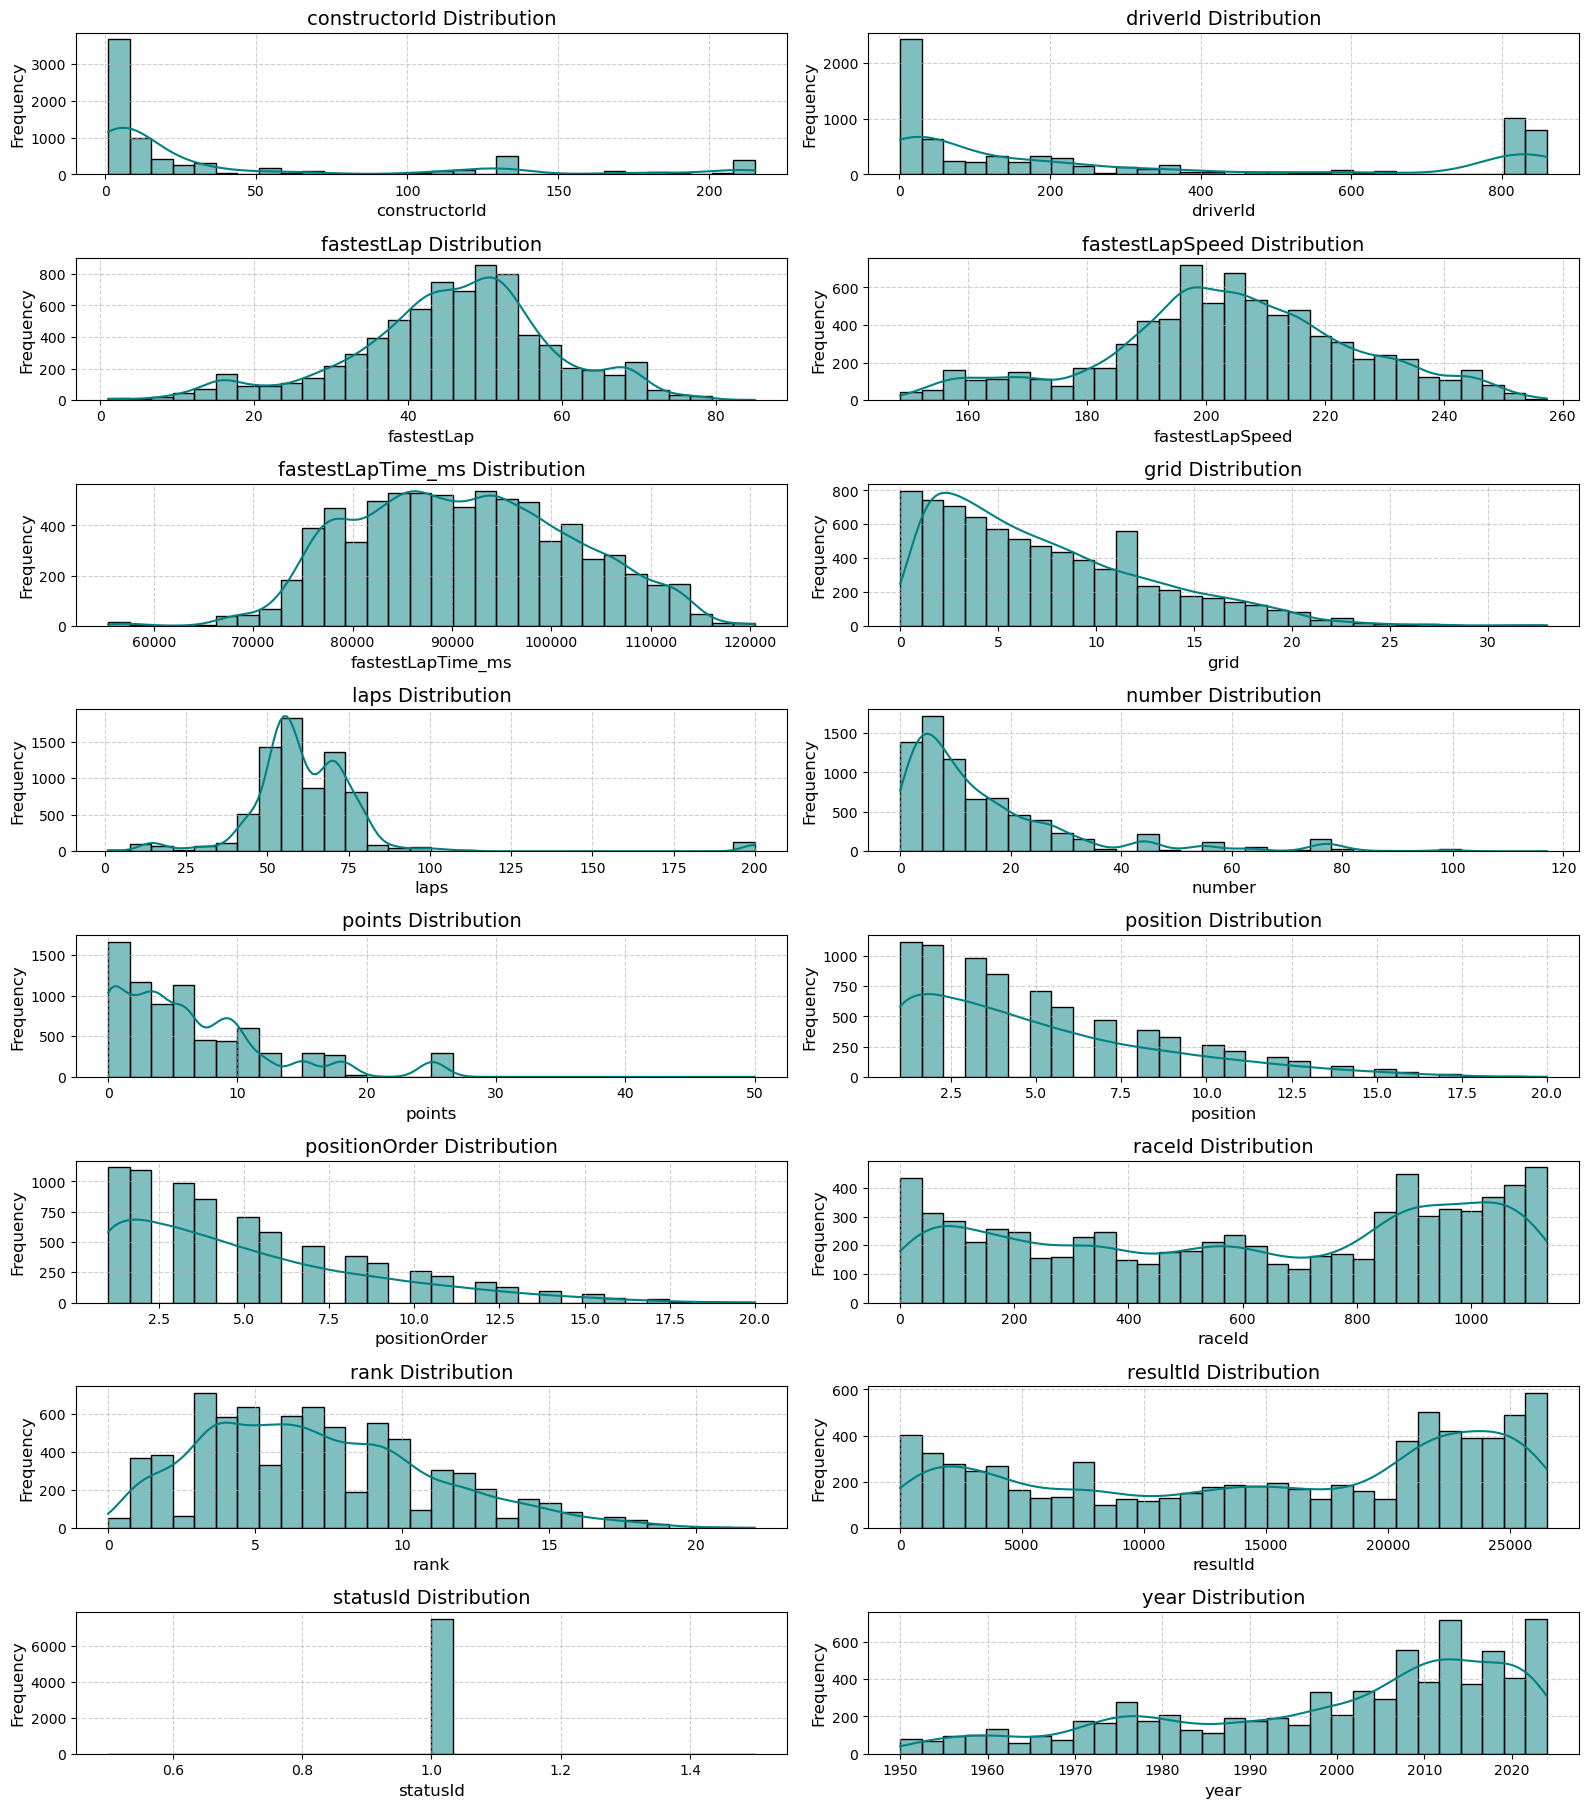

In [31]:
columns_to_plot = result_df.select_dtypes(include='number').columns.difference(['milliseconds'])

plt.figure(figsize=(16, 20)) 
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(len(columns_to_plot) // 2 + 1, 2, i) 
    sns.histplot(result_df[column].dropna(), kde=True, color='teal', bins=30)
    plt.title(f'{column} Distribution', fontsize=14)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout() 
plt.show()


In [32]:
result_df

,resultId,raceId,driverId,constructorId,number,grid,position,positionOrder,points,laps,milliseconds,fastestLap,rank,fastestLapSpeed,statusId,constructorRef,year,driverRef,fastestLapTime_ms
0,1.0,18.0,1.0,1.0,22.0,1.0,1.0,1.0,10.0,58.0,5690616.0,39.0,2.0,218.300,1.0,mclaren,2008.0,hamilton,87452.0
1,2.0,18.0,2.0,2.0,3.0,5.0,2.0,2.0,8.0,58.0,5696094.0,41.0,3.0,217.586,1.0,bmw_sauber,2008.0,heidfeld,87739.0
2,3.0,18.0,3.0,3.0,7.0,7.0,3.0,3.0,6.0,58.0,5698779.0,41.0,5.0,216.719,1.0,williams,2008.0,rosberg,88090.0
3,4.0,18.0,4.0,4.0,5.0,11.0,4.0,4.0,5.0,58.0,5707797.0,58.0,7.0,215.464,1.0,renault,2008.0,alonso,88603.0
4,5.0,18.0,5.0,1.0,23.0,3.0,5.0,5.0,4.0,58.0,5708630.0,43.0,1.0,218.385,1.0,mclaren,2008.0,kovalainen,87418.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7523,26512.0,1132.0,4.0,117.0,14.0,10.0,8.0,8.0,4.0,52.0,5010636.0,47.0,7.0,236.401,1.0,aston_martin,2024.0,alonso,89710.0
7524,26513.0,1132.0,848.0,3.0,23.0,9.0,9.0,9.0,2.0,52.0,5015446.0,52.0,8.0,236.380,1.0,williams,2024.0,albon,89718.0
7525,26514.0,1132.0,852.0,215.0,22.0,13.0,10.0,10.0,1.0,52.0,5026362.0,43.0,14.0,235.041,1.0,rb,2024.0,tsunoda,90229.0
7526,26515.0,1132.0,858.0,3.0,2.0,12.0,11.0,11.0,0.0,52.0,5036019.0,42.0,12.0,235.713,1.0,williams,2024.0,sargeant,89972.0


In [33]:
# Mevcut sütun adlarını kontrol edin
numeric_columns = result_df.select_dtypes(include=['float64', 'int64']).columns
numeric_columns

Index(['resultId', 'raceId', 'driverId', 'constructorId', 'number', 'grid',
       'position', 'positionOrder', 'points', 'laps', 'milliseconds',
       'fastestLap', 'rank', 'fastestLapSpeed', 'statusId', 'year',
       'fastestLapTime_ms'],
      dtype='object')

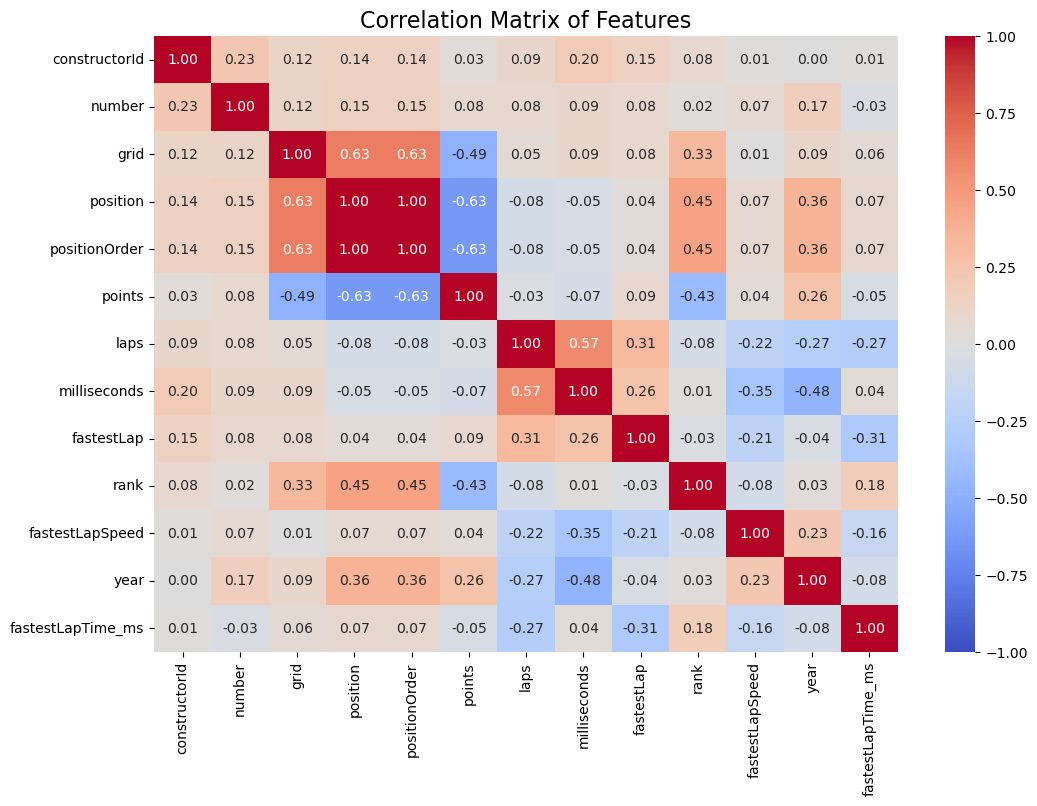

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt
corr_matrix = result_df[numeric_columns].drop(["resultId","statusId","raceId","driverId"],axis=1).corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title("Correlation Matrix of Features", fontsize=16)
plt.show()

Feature: fastestLapSpeed Score: 2.3528663103004326
Feature: raceId Score: 1.9297517330373122
Feature: fastestLapTime_ms Score: 1.7737860142068849
Feature: fastestLap Score: 1.2179219466105389
Feature: laps Score: 1.2057532731681775
Feature: year Score: 1.1984216949912225
Feature: rank Score: 0.8231595393626585
Feature: driverId Score: 0.4058166275845583
Feature: constructorId Score: 0.27838469837710234
Feature: points Score: 0.05126581774511596
Feature: number Score: 0.025466589015338492
Feature: grid Score: 0.009251090803938489
Feature: statusId Score: 1.4432899320127035e-15
Feature: position Score: 0.0
Feature: positionOrder Score: 0.0


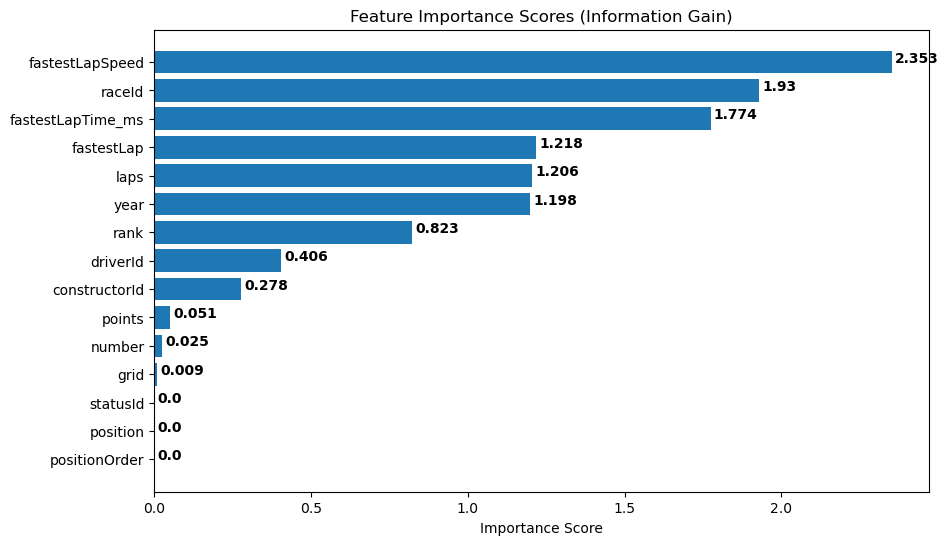

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_selection import mutual_info_regression

data = result_df[numeric_columns].sample(n=7528, random_state=42)

X = data.drop(columns=["milliseconds","resultId"])  
y = data['milliseconds']

ig = mutual_info_regression(X, y)

feature_scores = {}
for i in range(len(X.columns)):
    feature_scores[X.columns[i]] = ig[i]

feature_df = pd.DataFrame(list(feature_scores.items()), columns=['Feature', 'Score'])
sorted_features = feature_df.sort_values(by='Score', ascending=False)
for feature, score in sorted_features.values:
    print("Feature:", feature, "Score:", score)

fig, ax = plt.subplots(figsize=(10, 6))
y_pos = np.arange(len(sorted_features))
ax.barh(y_pos, sorted_features['Score'], align="center")
ax.set_yticks(y_pos)
ax.set_yticklabels(sorted_features['Feature'])
ax.invert_yaxis()
ax.set_xlabel("Importance Score")
ax.set_title("Feature Importance Scores (Information Gain)")


for i, v in enumerate(sorted_features['Score']):
    ax.text(v + 0.01, i, str(round(v, 3)), color="black", fontweight="bold")

plt.show()


                   Importance
year                 0.526660
laps                 0.165101
fastestLapSpeed      0.141074
raceId               0.066789
fastestLap           0.030467
fastestLapTime_ms    0.030327
rank                 0.012975
grid                 0.009963
number               0.003588
driverId             0.003364
constructorId        0.003059
position             0.002500
positionOrder        0.002214
points               0.001919
statusId             0.000000


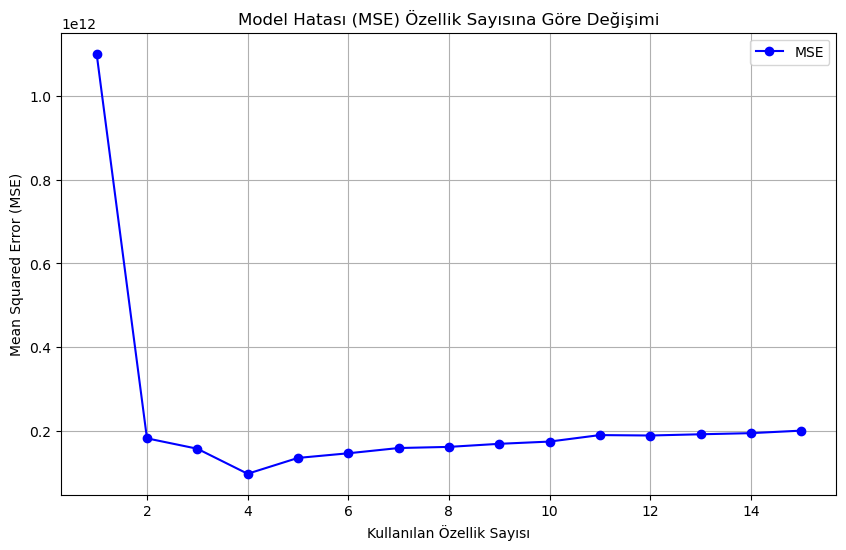

                   Importance
year                 0.526660
laps                 0.165101
fastestLapSpeed      0.141074
raceId               0.066789
fastestLap           0.030467
fastestLapTime_ms    0.030327
rank                 0.012975
grid                 0.009963
number               0.003588
driverId             0.003364
constructorId        0.003059
position             0.002500
positionOrder        0.002214
points               0.001919
statusId             0.000000
İlk 1 Özellik ile hata (MSE): 1099751528748.748
İlk 2 Özellik ile hata (MSE): 183230816763.9904
İlk 3 Özellik ile hata (MSE): 158484223395.26184
İlk 4 Özellik ile hata (MSE): 98794424620.04257
İlk 5 Özellik ile hata (MSE): 136550148913.18138
İlk 6 Özellik ile hata (MSE): 147618324937.76535
İlk 7 Özellik ile hata (MSE): 160132069839.6269
İlk 8 Özellik ile hata (MSE): 162854440191.83157
İlk 9 Özellik ile hata (MSE): 170168141599.10358
İlk 10 Özellik ile hata (MSE): 175509745187.40408
İlk 11 Özellik ile hata (MSE): 19

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

random_sample = result_df[numeric_columns].sample(n=7528 , random_state=42)

X = random_sample.drop(columns=["milliseconds","resultId"])  
y = random_sample['milliseconds']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf = RandomForestRegressor(n_estimators=30, random_state=42)
rf.fit(X_train, y_train)

feature_importances = pd.DataFrame(rf.feature_importances_, index=X_train.columns, columns=["Importance"])
feature_importances = feature_importances.sort_values(by="Importance", ascending=False)
print(feature_importances)

errors = []

for i in range(1, len(feature_importances) + 1):
    selected_features = feature_importances.head(i).index
    X_train_selected = X_train[selected_features]
    X_test_selected = X_test[selected_features]
    
    rf = RandomForestRegressor(n_estimators=30, random_state=42)
    rf.fit(X_train_selected, y_train)
    
    y_pred = rf.predict(X_test_selected)
    
    mse = mean_squared_error(y_test, y_pred)
    errors.append((i, mse))

error_df = pd.DataFrame(errors, columns=["Feature Count", "MSE"])

plt.figure(figsize=(10, 6))
plt.plot(error_df["Feature Count"], error_df["MSE"], marker='o', color='blue', linestyle='-', label='MSE')
plt.title("Model Hatası (MSE) Özellik Sayısına Göre Değişimi")
plt.xlabel("Kullanılan Özellik Sayısı")
plt.ylabel("Mean Squared Error (MSE)")
plt.grid(True)
plt.legend()
plt.show()
print(feature_importances)

for count, mse in errors:
    print(f"İlk {count} Özellik ile hata (MSE): {mse}")


In [45]:
top_features = feature_importances.head(4) 
features = top_features.index.tolist()
features

['year', 'laps', 'fastestLapSpeed', 'raceId']

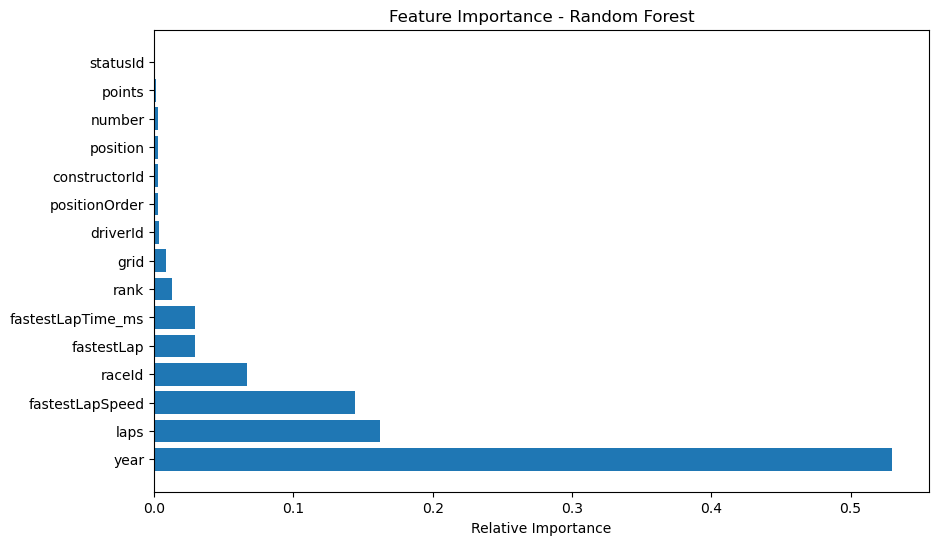

In [46]:
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

random_sample = result_df[numeric_columns].sample(n=7528 , random_state=42)
X = random_sample.drop(columns=["milliseconds","resultId"])  
y = random_sample['milliseconds']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = RandomForestRegressor(n_estimators=50)

model.fit(X_train, y_train)

importances = model.feature_importances_

# Öne çıkan özellikleri importance'a göre büyükten küçüğe sırala
indices = importances.argsort()[::-1]
top_n = 5
top_indices = indices[:top_n]

# Özellikler ve importances'ı sıralı olarak görselleştir
plt.figure(figsize=(10, 6))
plt.title("Feature Importance - Random Forest")
plt.barh(X_train.columns[indices], importances[indices])  # Sıralanmış özellikler
plt.xlabel("Relative Importance")
plt.show()



In [47]:
result = pd.get_dummies(result_df, 
                           columns=["driverRef", 'constructorRef'],  
                           prefix=['driver', 'constructor'], dtype=float)
result_df= result
result_df

,resultId,raceId,driverId,constructorId,number,grid,position,positionOrder,points,laps,milliseconds,fastestLap,rank,fastestLapSpeed,statusId,year,fastestLapTime_ms,driver_agabashian,driver_aitken,driver_albon,driver_alboreto,driver_alesi,driver_alguersuari,driver_allison,driver_alonso,driver_ambrosio,driver_amick,driver_amon,driver_angelis,driver_arnold,driver_arnoux,driver_arundell,driver_ascari,driver_attwood,driver_ayulo,driver_badoer,driver_baghetti,driver_baldi,driver_ball,driver_bandini,driver_banks,driver_barrichello,driver_barth,driver_bearman,driver_beaufort,driver_behra,driver_bell,driver_bellof,driver_beltoise,driver_berger,driver_bernard,driver_bettenhausen,driver_beuttler,driver_blundell,driver_bonetto,driver_bonnier,driver_bottas,driver_bourdais,driver_boutsen,driver_boyd,driver_brambilla,driver_branson,driver_brendon_hartley,driver_brise,driver_brooks,driver_brundle,driver_bruno_senna,driver_bryan,driver_buemi,driver_burgess,driver_button,driver_caffi,driver_capelli,driver_castellotti,driver_cesaris,driver_cevert,driver_cheesbourg,driver_cheever,driver_chilton,driver_christie,driver_clark,driver_collins,driver_comas,driver_connor,driver_coulthard,driver_courage,driver_crockett,driver_cross,driver_daly,driver_damon_hill,driver_darter,driver_davidson,driver_davies,driver_daywalt,driver_de_vries,driver_depailler,driver_dick_rathmann,driver_diniz,driver_donnelly,driver_donohue,driver_emerson_fittipaldi,driver_ericsson,driver_ertl,driver_fabi,driver_fagioli,driver_fangio,driver_farina,driver_faulkner,driver_fischer,driver_fisichella,driver_fittipaldi,driver_flaherty,driver_flockhart,driver_follmer,driver_foyt,driver_freeland,driver_frentzen,driver_frere,driver_gachot,driver_ganley,driver_garde,driver_gasly,driver_gavin,driver_gendebien,driver_gene,driver_george_amick,driver_george_connor,driver_gethin,driver_giacomelli,driver_gilles_villeneuve,driver_ginther,driver_giovinazzi,driver_giunti,driver_glock,driver_goldsmith,driver_gonzalez,driver_gregory,driver_griffith,driver_grosjean,driver_gugelmin,driver_gurney,driver_gutierrez,driver_hahne,driver_hailwood,driver_hakkinen,driver_hamilton,driver_hanks,driver_hartley,driver_hawthorn,driver_heidfeld,driver_herbert,driver_herman,driver_hill,driver_homeier,driver_hoyt,driver_hulkenberg,driver_hulme,driver_hunt,driver_ickx,driver_ireland,driver_irvine,driver_jabouille,driver_jack_brabham,driver_james,driver_jarier,driver_johansson,driver_johnson,driver_jolyon_palmer,driver_jones,driver_jules_bianchi,driver_katayama,driver_keke_rosberg,driver_keller,driver_kevin_magnussen,driver_klien,driver_kling,driver_kobayashi,driver_kovalainen,driver_kubica,driver_kvyat,driver_laffite,driver_lamy,driver_larini,driver_larson,driver_latifi,driver_lauda,driver_lawson,driver_leclerc,driver_lehto,driver_lennep,driver_lewis,driver_lewis-evans,driver_linden,driver_liuzzi,driver_lombardi,driver_love,driver_maggs,driver_magnussen,driver_mairesse,driver_maldonado,driver_mansell,driver_mantovani,driver_manzon,driver_mario_andretti,driver_marsh,driver_martini,driver_mass,driver_massa,driver_matta,driver_max_verstappen,driver_mazepin,driver_mazzacane,driver_mccoy,driver_mcgrath,driver_mclaren,driver_mcnish,driver_mcwithey,driver_menditeguy,driver_merzario,driver_michael_schumacher,driver_mick_schumacher,driver_miles,driver_mitter,driver_modena,driver_monteiro,driver_montoya,driver_morbidelli,driver_moreno,driver_moss,driver_musso,driver_nakajima,driver_nakano,driver_nannini,driver_nasr,driver_nazaruk,driver_niday,driver_nilsson,driver_norris,driver_ocon,driver_oliver,driver_pace,driver_panis,driver_parkes,driver_parsons,driver_patrese,driver_paul_russo,driver_perdisa,driver_perez,driver_pescarolo,driver_peterson,driver_petrov,driver_phil_hill,driver_piastri,driver_pic,driver_pietro_fittipaldi,driver_piquet,driver_piquet_jr,driver_pironi,driver_pirro,driver_pizzonia,driver_prost,driver_pryce,driver_raikkonen,driver_ralf_schumacher,driver_rathmann,driver_rebaque,driver_redman,driver_reece,driver_rees,

In [49]:
from sklearn.preprocessing import MinMaxScaler
numeric_columns = result_df.select_dtypes(include=['float64', 'int64']).columns
scaler = MinMaxScaler()
result_df[numeric_columns] = scaler.fit_transform(result_df[numeric_columns])
result_df


,resultId,raceId,driverId,constructorId,number,grid,position,positionOrder,points,laps,milliseconds,fastestLap,rank,fastestLapSpeed,statusId,year,fastestLapTime_ms,driver_agabashian,driver_aitken,driver_albon,driver_alboreto,driver_alesi,driver_alguersuari,driver_allison,driver_alonso,driver_ambrosio,driver_amick,driver_amon,driver_angelis,driver_arnold,driver_arnoux,driver_arundell,driver_ascari,driver_attwood,driver_ayulo,driver_badoer,driver_baghetti,driver_baldi,driver_ball,driver_bandini,driver_banks,driver_barrichello,driver_barth,driver_bearman,driver_beaufort,driver_behra,driver_bell,driver_bellof,driver_beltoise,driver_berger,driver_bernard,driver_bettenhausen,driver_beuttler,driver_blundell,driver_bonetto,driver_bonnier,driver_bottas,driver_bourdais,driver_boutsen,driver_boyd,driver_brambilla,driver_branson,driver_brendon_hartley,driver_brise,driver_brooks,driver_brundle,driver_bruno_senna,driver_bryan,driver_buemi,driver_burgess,driver_button,driver_caffi,driver_capelli,driver_castellotti,driver_cesaris,driver_cevert,driver_cheesbourg,driver_cheever,driver_chilton,driver_christie,driver_clark,driver_collins,driver_comas,driver_connor,driver_coulthard,driver_courage,driver_crockett,driver_cross,driver_daly,driver_damon_hill,driver_darter,driver_davidson,driver_davies,driver_daywalt,driver_de_vries,driver_depailler,driver_dick_rathmann,driver_diniz,driver_donnelly,driver_donohue,driver_emerson_fittipaldi,driver_ericsson,driver_ertl,driver_fabi,driver_fagioli,driver_fangio,driver_farina,driver_faulkner,driver_fischer,driver_fisichella,driver_fittipaldi,driver_flaherty,driver_flockhart,driver_follmer,driver_foyt,driver_freeland,driver_frentzen,driver_frere,driver_gachot,driver_ganley,driver_garde,driver_gasly,driver_gavin,driver_gendebien,driver_gene,driver_george_amick,driver_george_connor,driver_gethin,driver_giacomelli,driver_gilles_villeneuve,driver_ginther,driver_giovinazzi,driver_giunti,driver_glock,driver_goldsmith,driver_gonzalez,driver_gregory,driver_griffith,driver_grosjean,driver_gugelmin,driver_gurney,driver_gutierrez,driver_hahne,driver_hailwood,driver_hakkinen,driver_hamilton,driver_hanks,driver_hartley,driver_hawthorn,driver_heidfeld,driver_herbert,driver_herman,driver_hill,driver_homeier,driver_hoyt,driver_hulkenberg,driver_hulme,driver_hunt,driver_ickx,driver_ireland,driver_irvine,driver_jabouille,driver_jack_brabham,driver_james,driver_jarier,driver_johansson,driver_johnson,driver_jolyon_palmer,driver_jones,driver_jules_bianchi,driver_katayama,driver_keke_rosberg,driver_keller,driver_kevin_magnussen,driver_klien,driver_kling,driver_kobayashi,driver_kovalainen,driver_kubica,driver_kvyat,driver_laffite,driver_lamy,driver_larini,driver_larson,driver_latifi,driver_lauda,driver_lawson,driver_leclerc,driver_lehto,driver_lennep,driver_lewis,driver_lewis-evans,driver_linden,driver_liuzzi,driver_lombardi,driver_love,driver_maggs,driver_magnussen,driver_mairesse,driver_maldonado,driver_mansell,driver_mantovani,driver_manzon,driver_mario_andretti,driver_marsh,driver_martini,driver_mass,driver_massa,driver_matta,driver_max_verstappen,driver_mazepin,driver_mazzacane,driver_mccoy,driver_mcgrath,driver_mclaren,driver_mcnish,driver_mcwithey,driver_menditeguy,driver_merzario,driver_michael_schumacher,driver_mick_schumacher,driver_miles,driver_mitter,driver_modena,driver_monteiro,driver_montoya,driver_morbidelli,driver_moreno,driver_moss,driver_musso,driver_nakajima,driver_nakano,driver_nannini,driver_nasr,driver_nazaruk,driver_niday,driver_nilsson,driver_norris,driver_ocon,driver_oliver,driver_pace,driver_panis,driver_parkes,driver_parsons,driver_patrese,driver_paul_russo,driver_perdisa,driver_perez,driver_pescarolo,driver_peterson,driver_petrov,driver_phil_hill,driver_piastri,driver_pic,driver_pietro_fittipaldi,driver_piquet,driver_piquet_jr,driver_pironi,driver_pirro,driver_pizzonia,driver_prost,driver_pryce,driver_raikkonen,driver_ralf_schumacher,driver_rathmann,driver_rebaque,driver_redman,driver_reece,driver_rees,

In [55]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

random_sample = result_df[numeric_columns].sample(n=7528, random_state=42)
X = random_sample.drop(columns=["milliseconds", "resultId", "driverId", "constructorId"])  
y = random_sample["milliseconds"]

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

random_index = np.random.choice(X_test.index)
X_test_single = X_test.loc[[random_index]]
y_test_single = y_test.loc[random_index]


X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)

X_train_top = X_train.loc[:, features]
X_val_top = X_val.loc[:, features]
X_test_single_top = X_test_single.loc[:, features]


svr = SVR()
svr.fit(X_train_top, y_train)

y_val_pred = svr.predict(X_val_top)

# Validation R² ve MSE 
val_r2 = r2_score(y_val, y_val_pred)
val_mse = mean_squared_error(y_val, y_val_pred)

# Test seti  için tahmin
y_test_single_pred = svr.predict(X_test_single_top)

# Yüzde hata hesaplama
percentage_error = abs(y_test_single - y_test_single_pred) / y_test_single * 100

# Test seti için MSE 1 örnek
test_single_mse = mean_squared_error([y_test_single], [y_test_single_pred])


print("SVR Validation R-squared (R²):", val_r2)
print("SVR Validation Mean Squared Error (MSE):", val_mse)
print("SVR Validation Data Percentage:", (len(X_val) / len(X) * 100), "%")

print("SVR Test Single Prediction:", y_test_single_pred)
print("SVR Test Single Actual Value:", y_test_single)
print("SVR Percentage Error:", percentage_error[0], "%")
print("SVR Test Single Mean Squared Error (MSE):", test_single_mse)


SVR Validation R-squared (R²): 0.6219067113174195
SVR Validation Mean Squared Error (MSE): 0.004686628294538861
SVR Validation Data Percentage: 16.00690754516472 %
SVR Test Single Prediction: [0.3354497]
SVR Test Single Actual Value: 0.32670589094518215
SVR Percentage Error: 2.676354632472821 %
SVR Test Single Mean Squared Error (MSE): 7.645418265808405e-05


In [57]:
import pandas as pd
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.model_selection import train_test_split

# Veri örneklemesi
random_sample = result_df[numeric_columns].sample(n=7528, random_state=42)
X = random_sample.drop(columns=["milliseconds", "resultId", "driverId", "constructorId"]).values
y = random_sample['milliseconds'].values

# Eğitim ve test setini ayır
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Test setinden rastgele bir örnek seç
random_index = np.random.choice(range(X_test.shape[0]))
X_test_single = X_test[random_index].reshape(1, -1)  # X_test_single bir satır olacak şekilde yeniden şekillendir
y_test_single = y_test[random_index]

# X_train_val'ı pandas DataFrame'e çevir
X_train_val_df = pd.DataFrame(X_train_val, columns=random_sample.drop(columns=["milliseconds", "resultId", "driverId", "constructorId"]).columns)

# X_test_single'ı pandas DataFrame'e çevir
X_test_single_df = pd.DataFrame(X_test_single, columns=random_sample.drop(columns=["milliseconds", "resultId", "driverId", "constructorId"]).columns)

# 'features' listesi ile sadece o sütunları seçme
X_train_val_top = X_train_val_df.loc[:, features]  # features bir liste olmalı
X_test_single_top = X_test_single_df.loc[:, features]

# KNN algoritmasını elle uygulama
def knn_predict(X_train, y_train, X_test_single, k=5):
    # Mesafeleri hesapla (örneğin, Öklid mesafesi)
    distances = np.linalg.norm(X_train - X_test_single, axis=1)
    # En yakın k komşuyu seç
    nearest_indices = distances.argsort()[:k]
    # Komşuların hedef değerlerinin ortalamasını al
    return y_train[nearest_indices].mean()

# Test örneği için tahmin yap
y_test_single_pred = knn_predict(X_train_val_top.values, y_train_val, X_test_single_top.values, k=5)

# Yüzde hata hesaplama
percentage_error = abs(y_test_single - y_test_single_pred) / abs(y_test_single) * 100

# MSE hesaplama
test_single_mse = mean_squared_error([y_test_single], [y_test_single_pred])

# Sonuçları yazdır
print("KNN Test Single Prediction:", y_test_single_pred)
print("KNN Test Single Actual Value:", y_test_single)
print("KNN Percentage Error:", percentage_error, "%")
print("KNN Test Single Mean Squared Error (MSE):", test_single_mse)


KNN Test Single Prediction: 0.3887645413848075
KNN Test Single Actual Value: 0.38164019423160017
KNN Percentage Error: 1.8667706548969702 %
KNN Test Single Mean Squared Error (MSE): 5.0756322359413116e-05


In [59]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

random_sample = result_df[numeric_columns].sample(n=7528, random_state=42)
X = random_sample.drop(columns=["milliseconds", "resultId", "driverId", "constructorId"])  
y = random_sample['milliseconds']

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


random_index = np.random.choice(X_test.index)
X_test_single = X_test.loc[[random_index]]
y_test_single = y_test.loc[random_index]

X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)

X_train_top = X_train.loc[:, features]
X_val_top = X_val.loc[:, features]
X_test_single_top = X_test_single.loc[:, features]

dt = DecisionTreeRegressor(max_depth=70)
dt.fit(X_train_top, y_train)


y_val_pred = dt.predict(X_val_top)

# Validation R² ve MSE hesaplama
val_r2 = r2_score(y_val, y_val_pred)
val_mse = mean_squared_error(y_val, y_val_pred)

# Test seti rastgele seçilen örnek için tahmin
y_test_single_pred = dt.predict(X_test_single_top)

percentage_error = abs(y_test_single - y_test_single_pred) / y_test_single * 100

test_single_mse = mean_squared_error([y_test_single], [y_test_single_pred])

print("DT Validation R-squared (R²):", val_r2)
print("DT Validation Mean Squared Error (MSE):", val_mse)
print("DT Validation Data Percentage:", (len(X_val) / len(X) * 100), "%")

print("DT Test Single Prediction:", y_test_single_pred)
print("DT Test Single Actual Value:", y_test_single)
print("DT Percentage Error:", percentage_error[0], "%")
print("DT Test Single Mean Squared Error (MSE):", test_single_mse)


DT Validation R-squared (R²): 0.9158261498822389
DT Validation Mean Squared Error (MSE): 0.0009194046458402895
DT Validation Data Percentage: 14.001062699256112 %
DT Test Single Prediction: [0.38647401]
DT Test Single Actual Value: 0.3859985195655663
DT Percentage Error: 0.12318544291668272 %
DT Test Single Mean Squared Error (MSE): 2.2609453070189417e-07


In [61]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

random_sample = result_df[numeric_columns].sample(n=7528, random_state=42)
X = random_sample.drop(columns=["milliseconds", "resultId", "driverId", "constructorId"])  
y = random_sample['milliseconds']

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


random_index = np.random.choice(X_test.index)
X_test_single = X_test.loc[[random_index]]
y_test_single = y_test.loc[random_index]

X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)

X_train_top = X_train.loc[:, features]
X_val_top = X_val.loc[:, features]
X_test_single_top = X_test_single.loc[:, features]

rf = RandomForestRegressor(n_estimators=75, random_state=42)
rf.fit(X_train_top, y_train)

y_val_pred = rf.predict(X_val_top)

# Validation R² ve MSE hesaplama
val_r2 = r2_score(y_val, y_val_pred)
val_mse = mean_squared_error(y_val, y_val_pred)

# Test seti rastgele seçilen örnek için tahmin
y_test_single_pred = rf.predict(X_test_single_top)

percentage_error = abs(y_test_single - y_test_single_pred) / y_test_single * 100

test_single_mse = mean_squared_error([y_test_single], [y_test_single_pred])

# Sonuçları yazdır
print("RF Validation R-squared (R²):", val_r2)
print("RF Validation Mean Squared Error (MSE):", val_mse)
print("RF Validation Data Percentage:", (len(X_val) / len(X) * 100), "%")

print("RF Test Single Prediction:", y_test_single_pred)
print("RF Test Single Actual Value:", y_test_single)
print("RF Percentage Error:", percentage_error[0], "%")
print("RF Test Single Mean Squared Error (MSE):", test_single_mse)


RF Validation R-squared (R²): 0.9607214580136202
RF Validation Mean Squared Error (MSE): 0.0004290272327283082
RF Validation Data Percentage: 14.001062699256112 %
RF Test Single Prediction: [0.36620307]
RF Test Single Actual Value: 0.34498153622653427
RF Percentage Error: 6.151498945114452 %
RF Test Single Mean Squared Error (MSE): 0.00045035357160137383


In [62]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from keras.layers import Dense, Dropout

random_sample = result_df[numeric_columns]
X = random_sample.drop(columns=["milliseconds", "resultId", "driverId", "constructorId"])  
y = random_sample['milliseconds']
 
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)
 
random_index = np.random.choice(X_test.index)
X_test_single = X_test.loc[[random_index]]
y_test_single = y_test.loc[random_index]
 
 
X_train_top = X_train.loc[:,features]
X_val_top = X_val.loc[:,features]
X_test_single_top = X_test_single.loc[:,features]
 
 
model = Sequential()
model.add(Dense(units=512, activation='relu', input_dim=X_train_top.shape[1]))
model.add(Dense(units=256, activation='relu'))
model.add(Dense(units=1,activation="linear"))  
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error')
 
model.fit(X_train_top, y_train, epochs=50, batch_size=32, verbose=1)
 
y_val_pred = model.predict(X_val_top)
val_r2 = r2_score(y_val, y_val_pred)
val_mse = mean_squared_error(y_val, y_val_pred)

val_mape = np.mean(np.abs((y_val - y_val_pred.flatten()) / y_val) *100 )  

 
y_test_single_pred = model.predict(X_test_single_top)
 
percentage_error = abs(y_test_single - y_test_single_pred) / y_test_single * 100
 
test_single_mse = mean_squared_error([y_test_single], [y_test_single_pred.flatten()])
 
print("ANN Validation R-squared (R²):", val_r2)
print("ANN Validation Mean Squared Error (MSE):", val_mse)
print("ANN Validation Percentage Error:", val_mape, "%")
 
 
print("ANN Test Single Prediction:", y_test_single_pred)
print("ANN Test Single Actual Value:", y_test_single)
print("ANN Percentage Error:", percentage_error, "%")
print("ANN Test Single Mean Squared Error (MSE):", test_single_mse)



C:\Users\melis\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
151/151 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.0219
Epoch 2/50
151/151 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0041
Epoch 3/50
151/151 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0033
Epoch 4/50
151/151 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0035
Epoch 5/50
151/151 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0035
Epoch 6/50
151/151 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0033
Epoch 7/50
151/151 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0035
Epoch 8/50
151/151 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0036
Epoch 9/50
151/151 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0031
Epoch 10/50
151/151 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0033
Epoch 11/50
151/151 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0029
Epoch 12/50
151/151 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0027
Epoch 13/50
151/151 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0026
Epoch 14/50
151/151 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0031
Epoch 15/50
151/151 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - lo